# Departamento médico

## Importação das bibliotecas e base de dados

In [ ]:
import os # recursos do sistema operacional
import cv2 # OpenCV Visão computacional para fazer leitura de imagens
import tensorflow as tf # Trabalhar com DL e redes neurais
import numpy as np
from tensorflow.keras import layers, optimizers # layers = camadas das redes neurais # optimizers = algoritmos para ajustes dos pesos
from tensorflow.keras.applications import ResNet50 # Tipo de rede neural convolucional
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten 
from tensorflow.keras.models import Model # Criar rede neural
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Acessar diretório de imagens para enviarmos a rede neural
from tensorflow.keras.callbacks import ModelCheckpoint # Salvar os pesos da rede neural
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Utilizar imagens do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Diretório das imagens
xray_dir = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/DPTO_MEDICO/Dataset'
os.listdir(xray_dir)

['.DS_Store', '0', '1', '3', '2']

In [ ]:
# Acessar as imagens
image_generator = ImageDataGenerator(rescale = 1./255) # RESCALE : Mudar a escala da imagem | Converter RGB em escalas de 0 e 1

In [ ]:
# Imagens de treinamento | Realizar leitura das imagens
def get_train_generator(batch_size, directory, test = False):
  if test:
    return test_gen.flow_from_directory(batch_size = batch_size, shuffle=True, target_size=(256, 256), class_mode='categorical', subset='training', directory=directory) 
  
  return image_generator.flow_from_directory(batch_size = batch_size, shuffle=True, target_size=(256, 256), class_mode='categorical', subset='training', directory=directory) 
  # Batch size: separação das imagens
  # Shuffle: Aleatoriedade
  # Target_size: Tam das imagens (importante dependendo da rede neural)
  # Class Mode: Tipo da classe
  # Subset: Indicar que é imagem de treinamento

In [ ]:
train_generator = get_train_generator(batch_size = 40, directory = xray_dir)

Found 532 images belonging to 4 classes.


In [ ]:
train_images, train_labels = next(train_generator) # Leitura das imagens de 40 em 40

In [ ]:
img_per_batch, altura, largura, canais = train_images.shape
print(f'Cada batch contém {img_per_batch} imagens, medindo {altura}x{largura} possuindo {canais} canais, o que significa que é RGB')

Cada batch contém 40 imagens, medindo 256x256 possuindo 3 canais, o que significa que é RGB


### Classe das imagens
- 0: Imagens de COVID
- 1: Imagens normais
- 2: Pneumonia viral
- 3: Pneumonia bacterial

In [ ]:
classes = {0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

In [ ]:
# Classes para cada imagens
train_labels

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]],

## Visualização dos dados

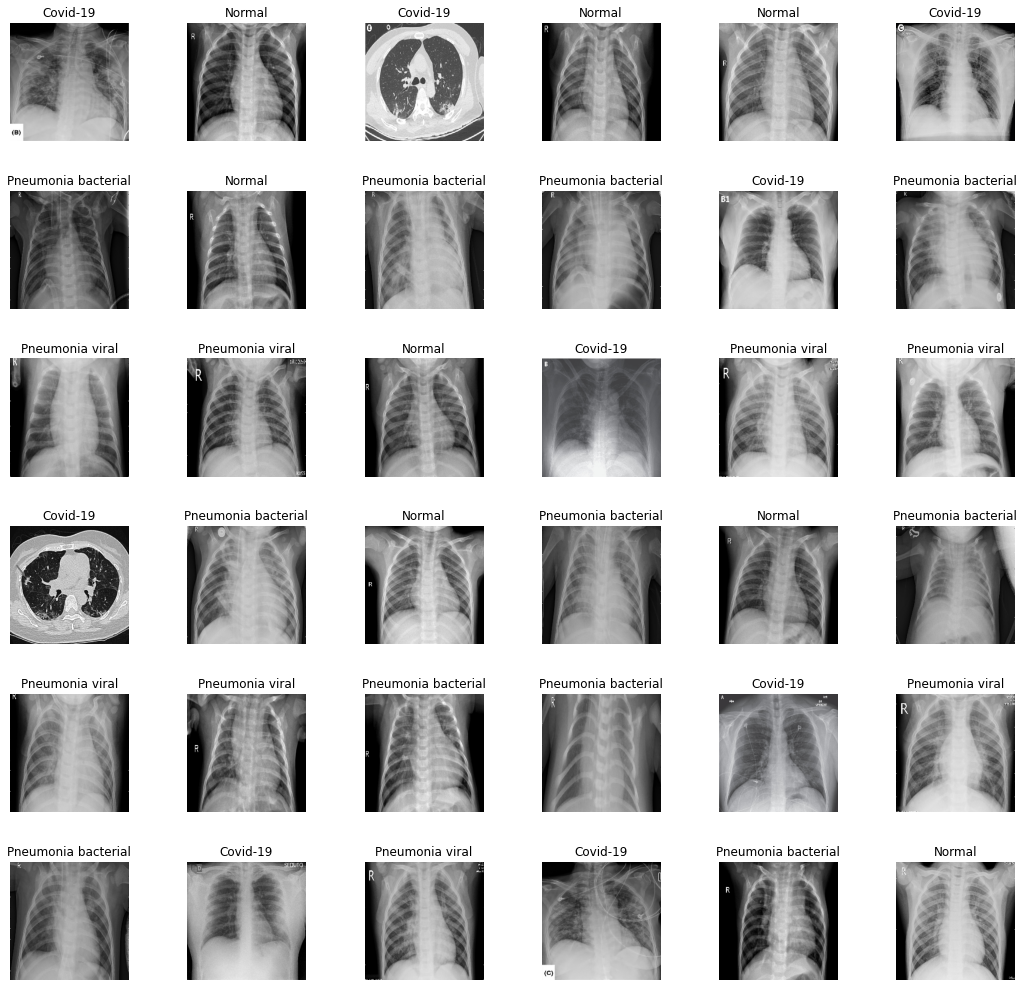

In [ ]:
linhas, colunas = 6, 6
fig, axes = plt.subplots(6, 6, figsize=(18, 18)) #6 linhas e 6 colunas | Tam do gráfico 12x12
axes = axes.ravel() # Transformar Matriz em Vetor
for i in np.arange(0, linhas*colunas):
  axes[i].imshow(train_images[i])
  axes[i].set_title(classes[np.argmax(train_labels[i])]) # Mostrar o título da classe da imagem | Argmax: Retorna o indice com maior valor
  axes[i].axis('off') # Tirar informação dos valores do eixo
plt.subplots_adjust(wspace = 0.5) # Deixar imagens mais espaçadas

## Carregamento da rede neural com pesos pré-treinados

In [ ]:
# Carregar os pesos pré treinados
base_model = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256,256,3))) 
# WEIGHTS: Qual base de dados ela foi treinada
# INCLUDE_TOP: Se for True ela incluirá as camadas densas da classificação dos objetos da imagenet, porém, nós temos nossa própria camada densa (imagens de raio-x)
# (256, 256) é a dimensão suportada no ResNet

In [ ]:
# Observação das camadas
base_model.summary()
# Há 23,587,712 de pesos

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
print(f'Há {len(base_model.layers)} camadas')

Há 175 camadas


In [ ]:
# Congelar os pesos nas camadas
# Todos os pesos das camadas convolucionais vamos repassar para o nosso modelo, logo, as camadas convolucionais não podem ser treinadas
# As ultimas 10 camadas iremos treinar para se adaptar melhor as nossas imagens (que são diferentes de imagens de gatos, cachorros, veiculos, etc.)
for layer in base_model.layers[:-10]:
  layers.trainable = False

## Construção e treinamento do modelo de deep learning
Parte específica do nosso problema

In [ ]:
# Cabeçalho da Rede Neural
head_model = base_model.output # Vai continuar de onde a ResNet parou
head_model = AveragePooling2D()(head_model) # Reduzir a dimensionalidade | a anterior é (8, 8, 2048)
head_model = Flatten()(head_model) # Converter dados de matriz para vetor
# Início das camadas densas
head_model = Dense(256, activation = 'relu')(head_model) # 256 é uma configuração arbitrária, é importante testar  
head_model = Dropout(0.2)(head_model) # Camada importante para treinamento de imagens, irá zerar 20% dos 256 neurônios da camada anterior para que ele não se adapte demais na base de dados (overfiting)
head_model = Dense(256, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(4, activation = 'softmax')(head_model) # 4 neuronios porque temos 4 classes | softmax é utilizado com problemas de classificação de mais de 2 classes (sigmoid foi utilizado no DEPT de RH)

In [ ]:
# Criar o modelo
model = Model(inputs = base_model.input, outputs = head_model)

In [ ]:
# Compilar
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr= 1e-4,  decay=1e-6), metrics = ['accuracy'])
# loss é função de erro: categorical_crossentropy por ser um problema de classificação
# Optimizer trabakha com ajuste dos pesos | utilizando o otimizador ADAM no projeto anterior, ele não foi bem
    # lr: taxa de aprendizagem
    # decay: de tempos em tempos vai diminuir a taxa de aprendizagem (indica o quão rápido  o algoritmo faz o processamento e encontrar os melhores pesos)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Salvar a rede neural | Por demorar muito, vamos salvar o modelo para carregar o modelo e fazer a classificação
checkpointer = ModelCheckpoint(filepath = 'weights.hdf5', save_best_only = False) # save_best_only salvar sempre o melhor modelo

In [ ]:
train_generator = get_train_generator(batch_size = 4, directory = xray_dir)
# É necessaraio redefinir o batch com 4 imagens para que o calculo dos pesos sejam feita de 4 em 4 imagens
# Com 40 dará erro porque temos poucas imagens por classe

Found 532 images belonging to 4 classes.


In [ ]:
# Histórico do treinamento
history = model.fit_generator(train_generator, epochs = 50, callbacks = [checkpointer]) # epochs: quantidade de reajustes dos pesos (arbitrário) | callbacks [checkpointer] para sempre salvar os pesos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
133/133 [==============================] - 98s 563ms/step - loss: 1.0379 - accuracy: 0.7350
Epoch 2/50
133/133 [==============================] - 35s 264ms/step - loss: 0.6151 - accuracy: 0.8703
Epoch 3/50
133/133 [==============================] - 35s 266ms/step - loss: 0.4443 - accuracy: 0.9135
Epoch 4/50
133/133 [==============================] - 36s 271ms/step - loss: 0.2817 - accuracy: 0.9305
Epoch 5/50
133/133 [==============================] - 36s 272ms/step - loss: 0.2446 - accuracy: 0.9718
Epoch 6/50
133/133 [==============================] - 36s 269ms/step - loss: 0.2415 - accuracy: 0.9643
Epoch 7/50
133/133 [==============================] - 35s 265ms/step - loss: 0.1399 - accuracy: 0.9624
Epoch 8/50
133/133 [==============================] - 36s 270ms/step - loss: 0.1686 - accuracy: 0.9718
Epoch 9/50
133/133 [==============================] - 36s 269ms/step - loss: 0.2419 - accuracy: 0.9718
Epoch 10/50
133/133 [==============================] - 36s 267ms/step - l

## Avaliação da rede neural

In [ ]:
test_directory = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/DPTO_MEDICO/Test'
os.listdir(test_directory)

['2', '3', '1', '0']

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255) # Alterar a escala das imagens para valores entre 0 e 1
test_generator =  get_train_generator(batch_size = 40, directory = test_directory, test = True)

Found 40 images belonging to 4 classes.


In [ ]:
# Avaliar
evaluate = model.evaluate_generator(test_generator)
print(f'Taxa de {round(evaluate[1]*100, 2)}% de acerto na base de teste')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Taxa de 72.5% de acerto na base de teste


In [ ]:
# Gerar matriz de confusão
prediction, original, image = [], [], []
for i in range(len(os.listdir(test_directory))): # 4 pastas, 4 classes
  for item in os.listdir(os.path.join(test_directory, str(i))):  # Percorrer cada imagem (retorna o nome da imagem)
    img = cv2.imread(os.path.join(test_directory, str(i), item)) # Carregar imagem
    img = cv2.resize(img, (256, 256)) # Mudar tamanho da imagem
    image.append(img)
    img = img/255 # colocar na escala de 0 e 1
    img = img.reshape(-1, 256, 256, 3) # qtd de imagens (-1 é ind), altura, largura, numero de canais

    predict = model.predict(img)
    predict = np.argmax(predict) # Indice do maior argumento (classe correta)
    prediction.append(predict)
    
    original.append(i)

In [ ]:
print(len(image))

40


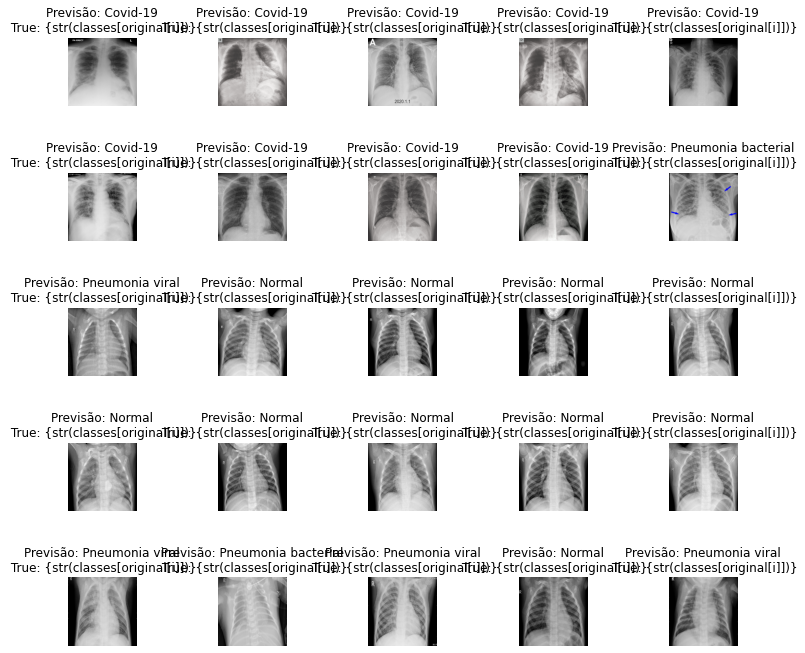

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
fig, axes = plt.subplots(5, 5, figsize=(12,12)) # 5 linhas e 5 colunas
axes = axes.ravel() # Transformar de matriz para  vevtor
for i in range(25):
  axes[i].imshow(image[i])
  axes[i].set_title(f'Previsão: {str(classes[prediction[i]])}\n True: {{str(classes[original[i]])}}')
  axes[i].axis('off') # Não mostra os eixos
plt.subplots_adjust(wspace = 1.2)

In [ ]:
classes

{0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

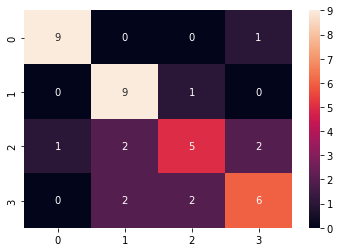

In [ ]:
# Matriz de confufsão
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)
# EIXO Y: ORIGINAL
# EIXO X: PREDIÇÃO

In [ ]:
print(classification_report(original, prediction)) # OBS: Não temos dados desbalanceados

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.69      0.90      0.78        10
           2       0.62      0.50      0.56        10
           3       0.67      0.60      0.63        10

    accuracy                           0.73        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.72      0.72      0.72        40



## Classificação de somente uma imagem
Simular ambiente de produção

In [ ]:
print('No outro arquivo .ypnb')

No outro arquivo .ypnb
